In [5]:
import numpy as np
import scipy.ndimage as ndimage
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt

SHAKEY_PATH = './data/shakey.150.gif'

In [20]:
def find_zero_crossings(grads):
    edges = np.pad(grads, ((0, 1), (0, 1)))
            
    gx_mask = np.where(edges[:-1, :-1] - edges[:-1, 1:] < 0, 1, 0)
    gy_mask = np.where(edges[:-1, :-1] - edges[1:, :-1] < 0, 1, 0)

    edges =  (gx_mask|gy_mask).astype(float)
    return edges

def variance_threshold(src, edges, threshold):
        win_mean = ndimage.uniform_filter(src, (5, 5))
        win_sqr_mean = ndimage.uniform_filter(src**2, (5, 5))
        win_var = win_sqr_mean - win_mean**2

        # Rescale the variance so I can actually use it
        scaled_var = ((win_var - win_var.min()) / 
               (win_var.max() - win_var.min())) * (255)

        # Mask the values accordingly
        low_variance_mask = scaled_var < threshold
        high_variance_mask = scaled_var >= threshold
        edges = np.where(low_variance_mask, 0, edges)
        edges = np.where(high_variance_mask, 1, edges)
        
        return edges

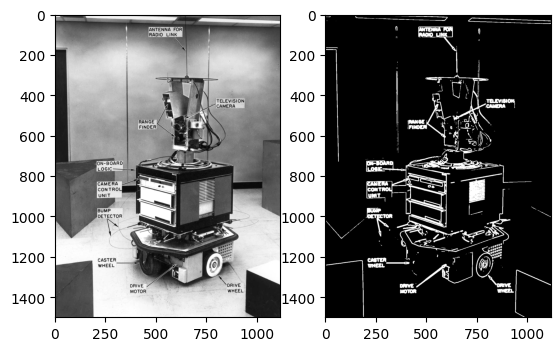

In [25]:
# Visualizations
fig = plt.figure()
plt.gray()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Processing
image_path = SHAKEY_PATH
image = Image.open(image_path).convert('L')
image = (np.array(image)).astype(np.float32)
filtered_image = ndimage.gaussian_laplace(image, 2)
edges = find_zero_crossings(filtered_image)
edges = variance_threshold(image, edges, 30)

# Display
ax1.imshow(image)
ax2.imshow(edges)
plt.show()

plt.imsave('edges_image.png', edges, cmap='gray')